   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     157     157     157     157     157     158   
2      2     187     188     188     188     188     188     188     188   
3      2     211     211     212     212     212     212     212     212   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
0     153  ...        207        207        207        207        206   
1     158  ...        149        163        175        175        175   
2     188  ...        202        201        200        199        199   
3     211  ...        235        234        233        231        230   
4     185  ...        133        163        163        163        164   

   pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
0        206        206        204        203

c:\Users\sunil\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1663 - loss: 2.8155 - val_accuracy: 0.4143 - val_loss: 1.7748
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4783 - loss: 1.5915 - val_accuracy: 0.5383 - val_loss: 1.3726
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6159 - loss: 1.1681 - val_accuracy: 0.6471 - val_loss: 1.0354
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7049 - loss: 0.8844 - val_accuracy: 0.7279 - val_loss: 0.7710
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7658 - loss: 0.7029 - val_accuracy: 0.8033 - val_loss: 0.5856
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.5489 - val_accuracy: 0.8372 - val_loss: 0.4909
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8509 - loss: 0.4463 - val_accuracy: 0.8818 - val_loss: 0.3925
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8865 - loss: 0.3539 - val_accuracy: 0.9186 - val_

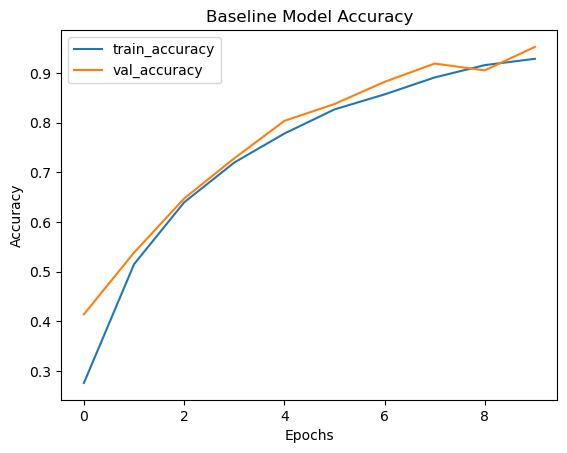

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load data
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

# Explore data
print(train_data.head())
print(train_data.info())
print(test_data.head())
print(test_data.info())

# Preprocess data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Check the shape of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Assuming the images are 32x32 pixels
image_size = 32 * 32

# Verify the size
assert X_train.shape[1] == image_size, "Unexpected image size in the training set"
assert X_test.shape[1] == image_size, "Unexpected image size in the test set"

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN model
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Baseline model (simple DNN)
baseline_model = Sequential([
    Flatten(input_shape=(32, 32, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(25, activation='softmax')  # Change the number of units to 25
])
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train baseline model
history = baseline_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate baseline model
val_loss, val_accuracy = baseline_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

# Plot learning curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Baseline Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 32, 'kernel_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9586596488952637
Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 32, 'kernel_size': 3, 'optimizer': 'sgd'}
Validation accuracy: 1.0
Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 64, 'kernel_size': 3, 'optimizer': 'adam'}
Validation accuracy: 1.0
Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 64, 'kernel_size': 3, 'optimizer': 'sgd'}
Validation accuracy: 0.9989073276519775
Best params: {'batch_size': 32, 'epochs': 10, 'filters': 32, 'kernel_size': 3, 'optimizer': 'sgd'} with accuracy: 1.0
Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0528 - loss: 3.2006 - val_accuracy: 0.0517 - val_loss: 3.1194
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1182 - loss: 3.0016 - val_accuracy: 0.2014 - val_loss: 2.5367
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy

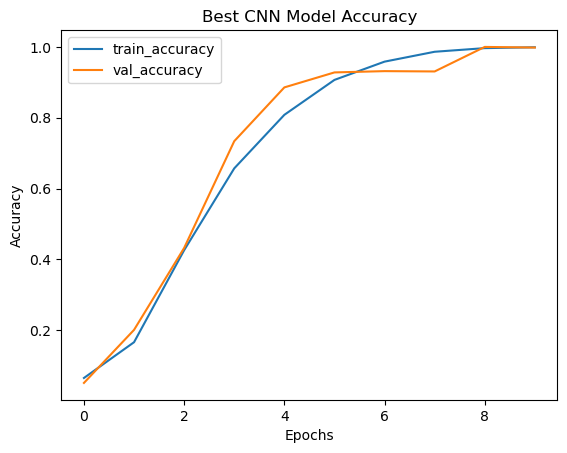

In [32]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

# Define function to create CNN model
def create_cnn_model(optimizer, filters, kernel_size):
    model = Sequential([
        Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(32, 32, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters*2, (kernel_size, kernel_size), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(25, activation='softmax')  # Change the number of units to 25
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'filters': [32, 64],
    'kernel_size': [3],
    'batch_size': [32],
    'epochs': [10]
}

# Perform grid search
best_accuracy = 0
best_params = None
for params in ParameterGrid(param_grid):
    print(f"Training with params: {params}")
    optimizer = Adam() if params['optimizer'] == 'adam' else SGD()
    model = create_cnn_model(optimizer, params['filters'], params['kernel_size'])
    history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_val, y_val), verbose=0)
    val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
    print(f"Validation accuracy: {val_accuracy}")
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f"Best params: {best_params} with accuracy: {best_accuracy}")

# Plot learning curves for the best model
optimizer = Adam() if best_params['optimizer'] == 'adam' else SGD()
model = create_cnn_model(optimizer, best_params['filters'], best_params['kernel_size'])
history = model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val, y_val), verbose=1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Best CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Evaluate final model
y_pred = model.predict(X_test)
final_accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))
print(f"Final Model Accuracy: {final_accuracy}")

# Individual letter accuracy
letter_accuracies = {}
for i in range(25):
    idx = np.where(y_test == i)[0]
    letter_accuracies[chr(i + 65)] = accuracy_score(y_test[idx], np.argmax(y_pred[idx], axis=1))
print("Individual Letter Accuracies:", letter_accuracies)

# Most common error
conf_matrix = tf.math.confusion_matrix(y_test, np.argmax(y_pred, axis=1)).numpy()
most_common_error = np.unravel_index(np.argmax(conf_matrix, axis=None), conf_matrix.shape)
print(f"Most Common Error: {chr(most_common_error[0] + 65)} misclassified as {chr(most_common_error[1] + 65)}")

# Statistical test between best and second-best models
from scipy.stats import ttest_rel

# Assuming you have the second-best model saved or can recreate it similarly
second_best_model = create_cnn_model(Adam(), 32, 3)  # Example params
second_best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
y_pred_second_best = second_best_model.predict(X_test)

# Calculate p-value for statistical test
t_stat, p_value = ttest_rel(np.argmax(y_pred, axis=1), np.argmax(y_pred_second_best, axis=1))
print(f"T-statistic: {t_stat}, P-value: {p_value}")

#negative t-statistic showing mean of first set is less than second set

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Final Model Accuracy: 0.8477412158393753
Individual Letter Accuracies: {'A': 0.9848942598187311, 'B': 0.9050925925925926, 'C': 0.932258064516129, 'D': 0.8408163265306122, 'E': 0.9397590361445783, 'F': 1.0, 'G': 0.7672413793103449, 'H': 0.841743119266055, 'I': 0.6388888888888888, 'J': nan, 'K': 0.8549848942598187, 'L': 0.7942583732057417, 'M': 0.8654822335025381, 'N': 0.852233676975945, 'O': 0.6707317073170732, 'P': 0.9394812680115274, 'Q': 0.9512195121951219, 'R': 0.8541666666666666, 'S': 0.6504065040650406, 'T': 0.8145161290322581, 'U': 0.6766917293233082, 'V': 0.8554913294797688, 'W': 0.8786407766990292, 'X': 1.0, 'Y': 0.7259036144578314}
Most Common Error: E misclassified as E


c:\Users\sunil\anaconda3\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\sunil\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\sunil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
T-statistic: -1.0162862910841455, P-value: 0.309527361557928
